In [19]:
import sklearn 
from sklearn.model_selection import train_test_split #Train/test split 
from sklearn.ensemble import RandomForestClassifier #Model
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd 

from sklearn.model_selection import cross_val_score #Cross-validation
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import confusion_matrix  #Metrics
from sklearn.metrics import f1_score 
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score #ROC curve 
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from mpl_toolkits.mplot3d import Axes3D 

In [20]:
#CSV read 
for dirname, _, filenames in os.walk("C:/Users/aleja/OneDrive/Documents/4rt LENGUAS APLICADAS/TFG/dataframe_def.csv"):
    for filename in filenames:
        print(os.path.join(dirname, filename))     
nRowsRead = None #Número de filas que leerá el programa. Si se quiere leer todo, entonces None
df = pd.read_csv("C:/Users/aleja/OneDrive/Documents/4rt LENGUAS APLICADAS/TFG/MODELS/dataframe_def.csv", delimiter=',', nrows = nRowsRead)
df.dataframeName = 'Dyt-desktop.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')


There are 3644 rows and 197 columns


In [21]:
#Balancing data 
NDys_df= df[df['Dyslexia']==0] #3252 samples with 196 features
Dys_df= df[df['Dyslexia']==1] #392 samples with 196 features
dys_tot, _ = Dys_df.shape
N_NDys= NDys_df.sample(dys_tot, random_state=10)
df= pd.merge(N_NDys, Dys_df, how='outer')

In [22]:
#Train/Test split 
y_axis= df.iloc[:,[-1]]
y= y_axis.to_numpy().flatten() #Labels (class 0 and 1)
X_axis= df.drop(y_axis.columns,axis = 1)
X= X_axis.values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=10)
 

In [23]:
#Model
rf= RandomForestClassifier(n_estimators=200, class_weight='balanced')
rf.fit(X_train, y_train)
rf.predict(X_test)
rf.score(X_test, y_test)
y_pred= rf.predict(X_test)
cm= confusion_matrix(y_test, y_pred)
tn, fp, fn, tp= cm.ravel()
recall= float(tp) / (tp + fn)
print(cm)
print('Recall:{}'.format(recall))

[[77 24]
 [20 75]]
Recall:0.7894736842105263


In [24]:
#Cross-validation
K_list = np.round(np.linspace(start=1, stop=500, num=50)).astype(int) 
recall = np.zeros(len(K_list))

for i in range(len(K_list)):
    rf = RandomForestClassifier(n_estimators=K_list[i], bootstrap=True, class_weight='balanced_subsample')
    rf.fit(X_train, y_train)
    tn, fp, fn, tp = confusion_matrix(y_val, rf.predict(X_val)).ravel()
    recall[i] = float(tp) / (tp + fn)

index_max = np.argmax(recall)

K_opt= K_list[index_max] #Best number of trees 

print('número de arboles optimo:{}'.format(K_opt))

rf= RandomForestClassifier(n_estimators=K_opt, bootstrap=True, class_weight='balanced_subsample')
rf.fit(X_train, y_train)


número de arboles optimo:133


RandomForestClassifier(class_weight='balanced_subsample', n_estimators=133)

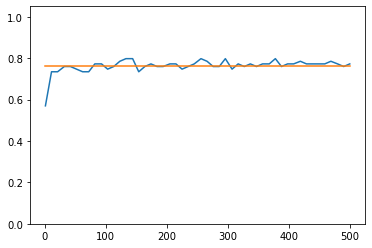

Recall mean:0.7625316455696204
f1 score:0.7700534759358288
[[81 23]
 [20 72]]


In [25]:
#Metrics 
plt.plot(K_list, recall)
mean_rec = recall.mean()
plt.plot(K_list, mean_rec*np.ones_like(K_list))
plt.ylim([0, 1.05])
plt.show()
y_pred= rf.predict(X_test)
cm= confusion_matrix(y_pred,y_test)
print('Recall mean:{}'.format(mean_rec))
print('f1 score:{}'.format(f1_score(y_pred, y_test)))
print(cm)

In [26]:
#Validation of final model

from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True)
scores = [] 
for train_idx, val_idx in kf.split(X):
    X_train_k, y_train_k = X[train_idx], y[train_idx]
    X_val_k, y_val_k = X[val_idx], y[val_idx]
    rf= RandomForestClassifier(n_estimators=K_opt, class_weight='balanced')
    rf.fit(X_train_k, y_train_k)
    y_pred_k= rf.predict(X_val_k)
    cm= confusion_matrix(y_val_k, y_pred_k)
    tn, fp, fn, tp = confusion_matrix(y_val_k, y_pred_k).ravel()
    recall= float(tp) / (tp + fn)
    scores.append(recall)

print('Recall mean:{}'.format(np.mean(scores)))

Recall mean:0.7982735250097253


In [27]:
#Final model
rf= RandomForestClassifier(n_estimators=K_opt, bootstrap=True, class_weight='balanced_subsample')
rf.fit(X_train, y_train)
y_pred= rf.predict(X_test)
cm= confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
recall= float(tp) / (tp + fn)
f1score= f1_score(y_pred, y_test)
print('Recall:{}'.format(recall))
print('f1:{}'.format(f1score))

Recall:0.7578947368421053
f1:0.7741935483870969


[0.         0.         0.         0.         0.         0.00990099
 0.00990099 0.00990099 0.00990099 0.00990099 0.01980198 0.01980198
 0.02970297 0.02970297 0.02970297 0.03960396 0.03960396 0.03960396
 0.03960396 0.04950495 0.05940594 0.08910891 0.08910891 0.08910891
 0.08910891 0.08910891 0.0990099  0.0990099  0.0990099  0.10891089
 0.13861386 0.15841584 0.16831683 0.18811881 0.21782178 0.26732673
 0.30693069 0.31683168 0.31683168 0.34653465 0.36633663 0.38613861
 0.40594059 0.41584158 0.43564356 0.47524752 0.48514851 0.52475248
 0.54455446 0.57425743 0.57425743 0.59405941 0.6039604  0.63366337
 0.66336634 0.68316832 0.68316832 0.69306931 0.72277228 0.74257426
 0.75247525 0.77227723 0.8019802  0.82178218 0.83168317 0.87128713
 0.9009901  0.94059406 0.97029703 1.        ]


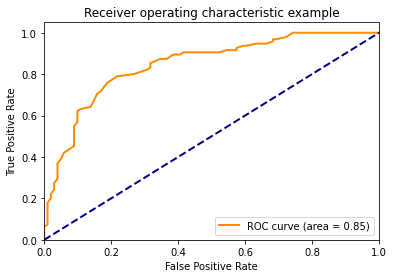

In [28]:
#ROC curve 
y_score= rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score, drop_intermediate=True)
roc_auc = auc(fpr, tpr)
print(fpr)
#Graphic  
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.savefig('recall_rf.png')
plt.show()


In [29]:
dict= {'y_score': y_score, 'y_test': y_test}
df_o= pd.DataFrame.from_dict(dict)
df_o.to_csv('rf_results_2.csv')
